In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import metrics
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Flatten

from nltk import word_tokenize, pos_tag, chunk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pprint import pprint
import pandas as pd
import numpy as np

from keras import optimizers
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.constraints import maxnorm
from keras.layers import Dropout
import os

In [5]:
path = '/content/'
filename = '25_cleaned_job_descriptions.csv'
data = pd.read_csv(os.path.join(path, filename), header = 0, names = ['Query', 'Description'])

In [6]:
train, test = train_test_split(data, test_size = 0.2)

train_description = train['Description']
train_labels = train['Query']
test_description = test['Description']
test_labels = test['Query']

In [7]:
num_labels = len(train_labels.unique().tolist())
vocab_size = 1000
batch_size = 32
nb_epoch = 50

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_description)
x_train = tokenizer.texts_to_matrix(train_description, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_description, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [8]:
model = Sequential()
model.add(Dense(4096, input_shape=(vocab_size,), activation = 'relu', kernel_initializer = 'glorot_normal', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1024, kernel_initializer = 'glorot_normal', activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = [metrics.categorical_accuracy, 'accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/50
225/225 [==============================] - 17s 72ms/step - loss: 2.8635 - categorical_accuracy: 0.1907 - accuracy: 0.1907 - val_loss: 1.7854 - val_categorical_accuracy: 0.5063 - val_accuracy: 0.5063
Epoch 2/50
225/225 [==============================] - 16s 70ms/step - loss: 1.5120 - categorical_accuracy: 0.5881 - accuracy: 0.5881 - val_loss: 1.4907 - val_categorical_accuracy: 0.5512 - val_accuracy: 0.5512
Epoch 3/50
225/225 [==============================] - 16s 70ms/step - loss: 1.0326 - categorical_accuracy: 0.7236 - accuracy: 0.7236 - val_loss: 1.3328 - val_categorical_accuracy: 0.6050 - val_accuracy: 0.6050
Epoch 4/50
225/225 [==============================] - 16s 69ms/step - loss: 0.7472 - categorical_accuracy: 0.8027 - accuracy: 0.8027 - val_loss: 1.2548 - val_categorical_accuracy: 0.6162 - val_accuracy: 0.6162
Epoch 5/50
225/225 [==============================] - 16s 70ms/step - loss: 0.5624 - categorical_accuracy: 0.8636 - accuracy: 0.8636 - val_loss: 1.2202 - val_ca

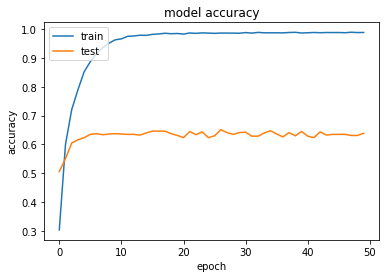

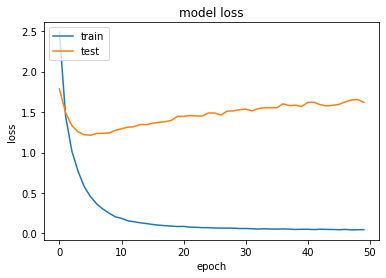

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
print("Quais são as suas habilidades profissionais?")
sentence = input("-> ")

# Encode the text
encoded_docs = [one_hot(sentence, 1000)]
# pad documents to a max length
padded_text = pad_sequences(encoded_docs, maxlen=1000, padding='post')
# Prediction based on model
prediction = model.predict(padded_text)

encoder = LabelBinarizer()
encoder.fit(test_labels)
result = encoder.inverse_transform(prediction)

print("Seu emprego pode ser:", result[0])

Quais são as suas habilidades profissionais?
-> mathematics
Seu emprego pode ser: Statistics
